# Haberman's Survival Data Set

The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

This dataset has 4 attributes:-
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical) -> As axillary lymph nodes are near the breasts, they are often the first location to which breast cancer spreads if it moves    beyond the breast tissue. The number of axillary lymph nodes can vary from person to person, ranging from five nodes to more than 30.
    
4. Survival status (class attribute)
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 years

# Objective
Determine if a patient would survive a cancer treatment or not.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/haberman.csv")

Mounted at /content/drive


In [4]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Here nodes are refering to lymph nodes.


In [6]:
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# 2-D Scatter Plot



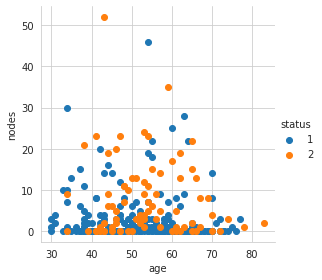

In [28]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

The above plot is incunclusive and doesn't provide much insight into the data. 

# Pair-Plots

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


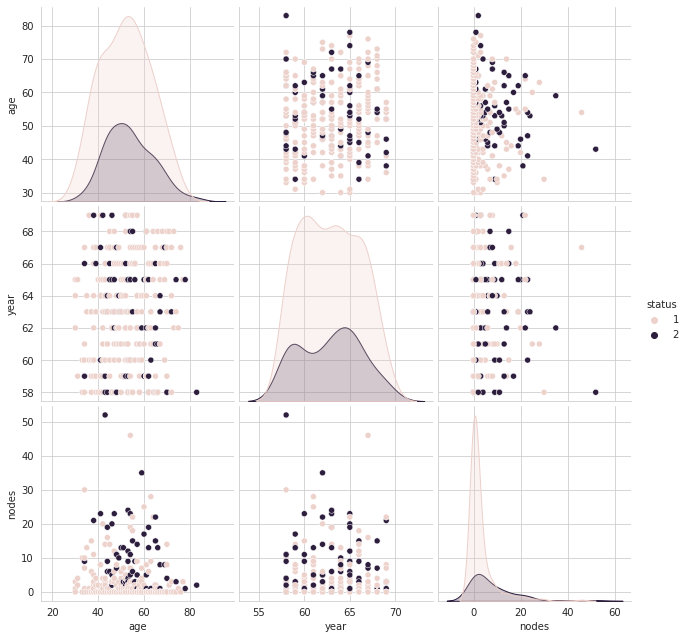

In [8]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", size=3);
plt.show()

# Observations:

*   Plot between the year of operation and Lymph nodes doesn't make much distinction between survivors and dead patients.
*   Plot between the year of operation and patient's age don't make a distinction between survivors and dead patients.




# Histograms, PDF, CDF

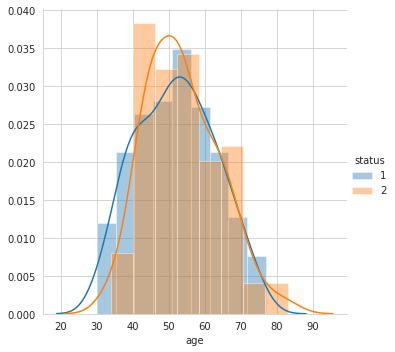

In [27]:
sns.FacetGrid(data,hue="status", size =5) \
    .map(sns.distplot,"age") \
    .add_legend()
plt.show()

  *   Mean age of dead patients is around 50 years (at the time of operation).
  *   Mean age of surviving patients is around 53 years (at the time of operation)



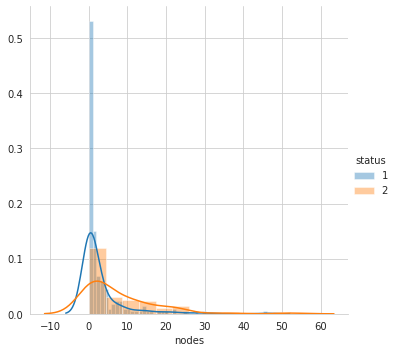

In [26]:
sns.FacetGrid(data,hue="status", size =5) \
    .map(sns.distplot,"nodes") \
    .add_legend()
plt.show()

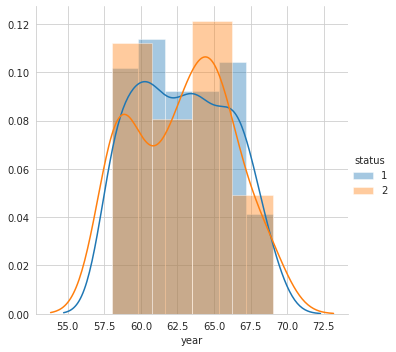

In [25]:
sns.FacetGrid(data,hue="status", size =5) \
    .map(sns.distplot,"year") \
    .add_legend()
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


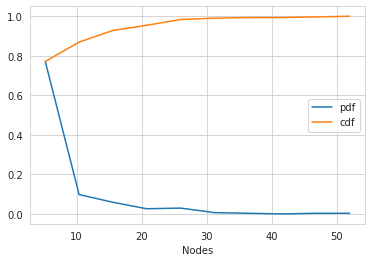

In [22]:
counts, bin_edges = np.histogram(data['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.xlabel("Nodes")

plt.legend()
plt.show();

*   The graph shows that almost 80% of the patients in the dataset have less than 10 nodes.
*   There is a less than 20% of patients who have more than 10 nodes.



[0.01633987 0.03594771 0.02614379 0.0620915  0.09803922 0.05228758
 0.08169935 0.09150327 0.08169935 0.09803922 0.08496732 0.04901961
 0.06535948 0.06862745 0.01960784 0.03921569 0.01633987 0.00653595
 0.00326797 0.00326797]
[30.   32.65 35.3  37.95 40.6  43.25 45.9  48.55 51.2  53.85 56.5  59.15
 61.8  64.45 67.1  69.75 72.4  75.05 77.7  80.35 83.  ]


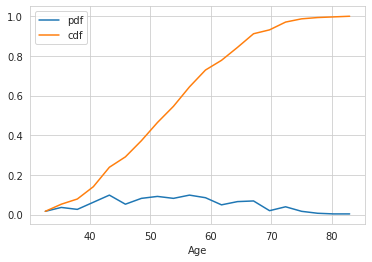

In [24]:
counts, bin_edges = np.histogram(data['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.xlabel("Age")
plt.legend()
plt.show();

*   80% of patients are of age 60 below.

# Box-Plots,Violin-Plots

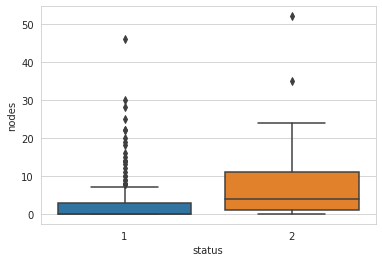

In [19]:
sns.boxplot(x='status',y='nodes', data=data)
plt.show()

Above plot shows, there are lesser number of nodes in the case of surviving patients.

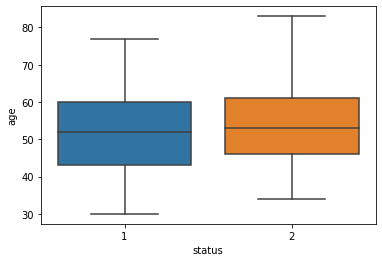

In [ ]:
sns.boxplot(x='status',y='age', data=data)
plt.show()

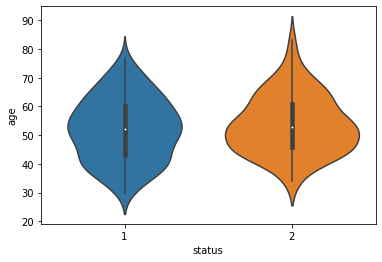

In [ ]:
sns.violinplot(x="status", y="age", data=data, size=8)
plt.show()

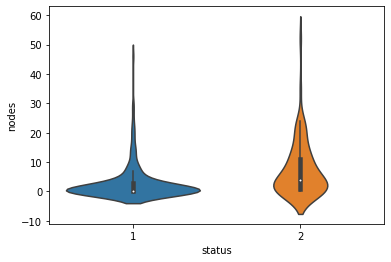

In [ ]:
sns.violinplot(x="status", y="nodes", data=data, size=8)
plt.show()

# Summary of Univariate Analysis.


*   Number of nodes seems to be the most important feature in determining weather a patient will survive or not.
*   Age is not a good indicator of surviving and dead patients.


*   Year of Operation is not a good indicator of surviving and dead patients.






# Summary of Bivariate Analysis.


*   None of the pairs of features were useful for ganing insights from the data.

